### MODELO 2 DE MACHINE LEARNING

usare pipelines


Se considera que lo que el modelo de ML debe predecir, es como puntuará un usuario un contenido. En funcion de esta prediccion se puede hipotetizar qué recomendar, considerando que este usuario puntuaria dichas peliculas de manera positiva. 


Para ello debo realizar una etapa de EXPLORACION DE DATOS.
categorizando el tipo de las variables relevantes y funcionales para el modelo.
explorando tipo de variables, utilidad y completitud de los datos de cada columna. 
buscando y operando de manera logica sobre los valores que estas poseen(busqueda y tratamiento de outliers, 
unificacion de categorias sinonímicas, reduccion de categorias)
 

modelos que puedo llegar a utilizar:
-k vecinos (este puede categorizar tipos de usuarios, en funcion por ejemplo si les gustan las series o las peliculas, si prefieren una plataforma u otra, si prefieren peliculas cercanas a determinados años? mediante la columna release_year,  genero de la pelicula mediante la columna listed_in )

In [162]:

# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [163]:
movie_df=pd.read_csv('dfdef.csv')

#se decide utilizar el dataframe trabajado en base a la covarianza en las elecciones de un usuario especifico con el resto
#usando este dataset para entrenar el modelo en funcion en este caso tambien del contenido.
#dando un enfoque de recomendacion hibrido. 
rating_df=pd.read_csv('user_pearson.csv')

In [164]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     22998 non-null  int64  
 1   id             22998 non-null  object 
 2   rating_x       22998 non-null  float64
 3   show_id        22998 non-null  object 
 4   type           22998 non-null  object 
 5   title          22998 non-null  object 
 6   director       14739 non-null  object 
 7   cast           17677 non-null  object 
 8   country        11499 non-null  object 
 9   date_added     13356 non-null  object 
 10  release_year   22998 non-null  int64  
 11  rating_y       22998 non-null  object 
 12  duration       22516 non-null  object 
 13  duration_int   22516 non-null  float64
 14  duration_type  22516 non-null  object 
 15  listed_in      22998 non-null  object 
 16  description    22994 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 

In [165]:

rating_df.rename(columns = {'movieId': 'id'}, inplace = True)
rating_df.head()


,Unnamed: 0,weighted_average_recommendation_score,id,recomendada
0,0,5.0,hs1384,True
1,1,5.0,ns6485,True
2,2,5.0,ns6584,True
3,3,5.0,as1906,True
4,4,5.0,ns6576,True


In [166]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = [ 'rating_y','listed_in', 'duration_type','type' ]

for col in cols_cat:
  print(f'Columna {col}: {movie_df[col].nunique()} subniveles')
# Los resultados no son tan alentadores, ya que la categorizacion no es tan precisa. 
# Principalmente en el tipo o genero de la pelicula.
# De todos modos se vera la posibilidad de unificar categorias,
# para generar variables mas relevantes para el modelo. 
 


Columna rating_y: 106 subniveles
Columna listed_in: 1687 subniveles
Columna duration_type: 2 subniveles
Columna type: 2 subniveles


In [167]:
#No se encuentran columnas duplicadas.
print(f'Tamaño del set antes de eliminar las filas repetidas: {movie_df.shape}')
movie_df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {movie_df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (22998, 17)
Tamaño del set después de eliminar las filas repetidas: (22998, 17)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

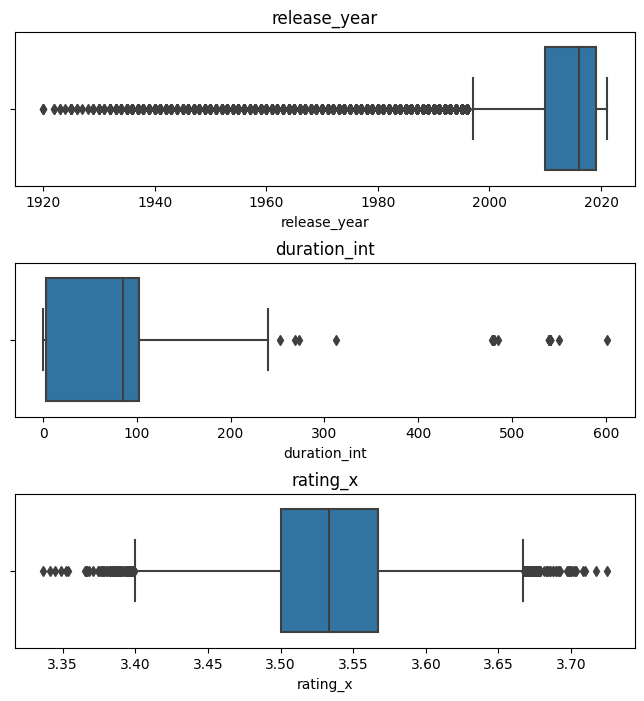

In [168]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['release_year','duration_int','rating_x' ]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=movie_df, ax=ax[i])
    ax[i].set_title(col)
    
    
    # rating_x es la variable del promedio de valoracion realizado por los usuarios a las diferentes peliculas
    # llama la atencion en duration_int que algunos registros se extiendan por varias horas. 
    # pero por se tan pocos se decide no borrarlos, ya que no se tiene certeza e que consistan en errores
    # puede haber contenido audiovisual extenso. 
    

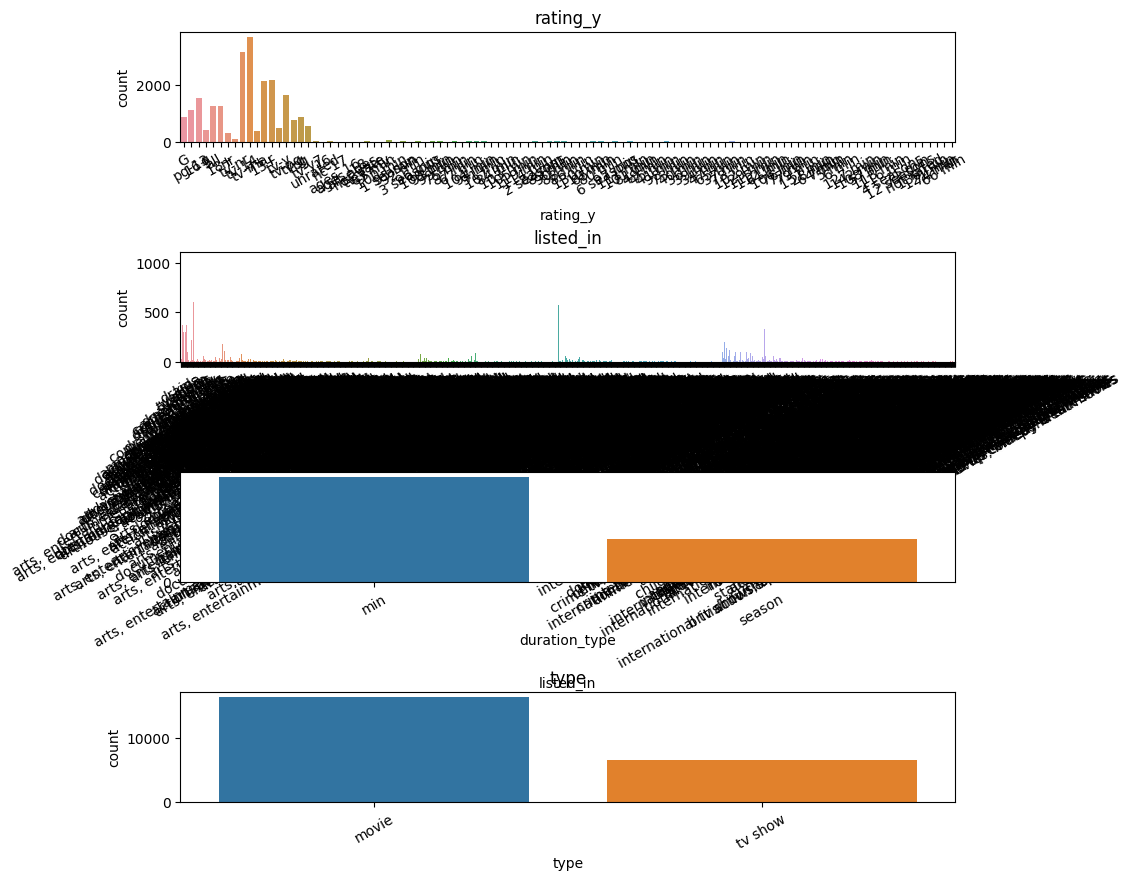

In [169]:
# Graficar los subniveles de cada variable categórica
#de esta manera podremos visualizar qué errores poseen y como estos estan distribuidos. 

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=movie_df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [170]:
#Se verifican los valores erroneos de la variable

np.unique(movie_df.rating_y)

array(['1 season', '100 min', '101 min', '102 min', '103 min', '104 min',
       '105 min', '106 min', '107 min', '108 min', '109 min', '110 min',
       '111 min', '112 min', '114 min', '115 min', '116 min', '118 min',
       '119 min', '12 seasons', '121 min', '127 min', '129 min', '13+',
       '130 min', '136 min', '142 min', '157 min', '16', '16+', '18+',
       '2 seasons', '28 min', '3 seasons', '34 min', '36 min', '37 min',
       '39 min', '4 seasons', '40 min', '41 min', '45 min', '47 min',
       '49 min', '5 min', '57 min', '6 min', '6 seasons', '61 min',
       '64 min', '65 min', '66 min', '67 min', '7 min', '7+', '71 min',
       '73 min', '74 min', '75 min', '76 min', '77 min', '78 min',
       '79 min', '80 min', '81 min', '82 min', '83 min', '84 min',
       '85 min', '86 min', '87 min', '88 min', '89 min', '90 min',
       '91 min', '92 min', '93 min', '94 min', '95 min', '96 min',
       '97 min', '98 min', '99 min', 'G', 'ages_16_', 'ages_18_', 'all',
       'all_a

In [171]:
##VARIABLE RATING_Y - INDICA CLASIFICACION ETAREA DE PELICULAS:
#se comienza a replazar los valores erroneos de la variable o repetidos. se deja solo 'unrated'
#unrates
errores= ['1 season', '100 min','not_rate','ur','nr', 'tv-nr','not rated', '101 min', '102 min', '103 min', '104 min','105 min', '106 min', '107 min', '108 min', '109 min', '110 min','111 min', '112 min', '114 min', '115 min', '116 min', '118 min','119 min', '12 seasons', '121 min', '127 min', '129 min', '13+','130 min', '136 min', '142 min', '157 min', '16', '16+', '18+','2 seasons', '28 min', '3 seasons', '34 min', '36 min', '37 min','39 min', '4 seasons', '40 min', '41 min', '45 min', '47 min','49 min', '5 min', '57 min', '6 min', '6 seasons', '61 min','64 min', '65 min', '66 min', '67 min', '7 min', '7+', '71 min','73 min', '74 min', '75 min', '76 min', '77 min', '78 min','79 min', '80 min', '81 min', '82 min', '83 min', '84 min','85 min', '86 min', '87 min', '88 min', '89 min', '90 min','91 min', '92 min', '93 min', '94 min', '95 min', '96 min','97 min', '98 min', '99 min']

movie_df.rating_y = movie_df.rating_y.replace(errores,'unrated')
#g, aptas para todo publico
errores2=['all_ages','all','G', 'tv-g','r','tv-y' ]
movie_df.rating_y = movie_df.rating_y.replace(errores2,'g')
#pg con supervision de padres
errores3=[ 'tv-pg' ]
movie_df.rating_y = movie_df.rating_y.replace(errores3,'pg')
#niños mayores de 7años
errores4=[ 'tv-y7','tv-y7-fv' ]
movie_df.rating_y = movie_df.rating_y.replace(errores4,'y7')
#mayores de 17
errores5=[ 'tv-ma','nc-17' ]
movie_df.rating_y = movie_df.rating_y.replace(errores5,'+17')


# 

In [172]:
#nos quedamos con nueve categorias, un numero mucho mas util para el modelo. 
movie_df.rating_y.unique()

#esta variable se podria convertir en ordinal, ya que a mayor edad, mas rangos de peliculas se pueden mostrar. 
#pero a usuarios pequeños no se le pueden recomendar peliculas para adultos. 


array(['g', 'pg-13', 'unrated', 'tv-14', '+17', 'pg', 'y7', 'ages_16_',
       'ages_18_'], dtype=object)

In [173]:
#LISTED_IN genero de las peliculas:

#Por la exesiva cantidad de valores no puedo visualizar las categorias o si las mismas tienen un error en ellas
#por lo sicedido en la columna anterior supongo que hay errores. 
#aunque por el grafico se pueden ver que hay categorias predominantes
#se podrian usar esos valores para generar categorias legibles. Al menos en los films que las posean. 
#ej, si la categoria no supera los 50 registros que se remplace por no categorizada. 
generos=np.unique(movie_df.listed_in)


In [174]:
resultados = movie_df.listed_in.value_counts()
resultados

drama                              1061
comedy                              608
documentaries                       573
comedy, drama                       421
drama, suspense                     399
                                   ... 
cartoons, family, kids                1
adventure, drama, family              1
comedy, latino, news                  1
comedy, documentaries, stand up       1
documentaries, dramas                 1
Name: listed_in, Length: 1687, dtype: int64

In [175]:
movie_df = movie_df.drop('show_id', 1)
movie_df = movie_df.drop('Unnamed: 0', 1)
movie_df = movie_df.drop('director', 1)
movie_df = movie_df.drop('cast', 1)
movie_df = movie_df.drop('country', 1)
movie_df = movie_df.drop('date_added', 1)
movie_df = movie_df.drop('duration', 1)
movie_df = movie_df.drop('duration_type', 1)
movie_df = movie_df.drop('listed_in', 1)
movie_df = movie_df.drop('title', 1)
movie_df = movie_df.drop('description', 1)

#Df rating
rating_df = rating_df.drop('Unnamed: 0', 1)

rating_df = rating_df.drop('recomendada', 1)

C:\Users\Martin Rodrigo\AppData\Local\Temp\ipykernel_12220\802029753.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movie_df = movie_df.drop('show_id', 1)
C:\Users\Martin Rodrigo\AppData\Local\Temp\ipykernel_12220\802029753.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movie_df = movie_df.drop('Unnamed: 0', 1)
C:\Users\Martin Rodrigo\AppData\Local\Temp\ipykernel_12220\802029753.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movie_df = movie_df.drop('director', 1)
C:\Users\Martin Rodrigo\AppData\Local\Temp\ipykernel_12220\802029753.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movie_df = movie_df.drop('cast', 1)
C:\User

In [176]:
movie_df.head()

,id,rating_x,type,release_year,rating_y,duration_int
0,as1,3.467131,movie,2014,g,113.0
1,as10,3.439571,movie,1994,g,92.0
2,as100,3.609302,movie,1993,pg-13,109.0
3,as1000,3.556701,movie,2014,unrated,90.0
4,as1001,3.585288,movie,2016,g,84.0


In [177]:

df_f= rating_df.merge(movie_df)

In [185]:
df_f.head()

,WAR_score,id,rating_x,type,release_year,rating_y,duration_int
0,5.0,hs1384,3.573144,1,3,g,1.0
1,5.0,ns6485,3.506452,0,3,tv-14,118.0
2,5.0,ns6584,3.467710,0,2,g,93.0
3,5.0,as1906,3.524468,1,2,unrated,1.0
4,5.0,ns6576,3.550104,0,2,g,110.0


In [179]:
a = df_f.release_year.unique()

In [180]:
a.sort()

In [181]:
a

array([1920, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021], dtype=int64)

In [182]:
errores=[ 1920, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942,1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979 ]
df_f.release_year = df_f.release_year.replace(errores, 0) # peliculas antiguas (1920-1979)

errores1=[ 1980, 1981, 1982, 1983, 1984, 1985, 1986,1987, 1988, 1989, 1990, 1991, 1992,   
          1993, 1994, 1995, 1996, 1997,1998, 1999 ]
df_f.release_year = df_f.release_year.replace(errores1, 1 )   # peliculas clasicas (1980-1999)

errores2=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015 ]
df_f.release_year = df_f.release_year.replace(errores2, 2 )  # peliculas recientes (2000-2015)
errores5=[2016, 2017, 2018, 2019, 2020, 2021]
df_f.release_year = df_f.release_year.replace(errores5, 3 )  # peluculas estreno (2016-2021.... actualidad)

In [183]:
df_f.type = df_f.type.replace('movie', 0 )  # peluculas ahora valen 0

df_f.type = df_f.type.replace('tv show', 1 )  # series ahora valen 1

In [188]:
# renombramos la columna para optimiza el espacio
df_f.rename(columns = {'weighted_average_recommendation_score': 'WAR_score'}, inplace = True)

df_f.rename(columns = {'rating_y': 'rating'}, inplace = True)

df_f.rename(columns = {'rating_x': 'score'}, inplace = True)

In [207]:
df_f.id.replace(to_replace= r'as', value='010', regex= True, inplace= True) # Reemplazamos as por un numero 010 para convertir a valor numerico

df_f.id.replace(to_replace= r'ds', value='020', regex= True, inplace= True) # Reemplazamos ds por un numero 020

df_f.id.replace(to_replace= r'hs', value='030', regex= True, inplace= True) # Reemplazamos hs por un numero 030

df_f.id.replace(to_replace= r'ns', value='040', regex= True, inplace= True) # Reemplazamos ns por un numero 040

In [209]:
df_f.rating.unique()

array(['g', 'tv-14', 'unrated', 'pg', '+17', 'pg-13', 'y7', 'ages_18_',
       'ages_16_'], dtype=object)

In [210]:
df_f.rating = df_f.rating.replace('unrated', 0 ) 
df_f.rating = df_f.rating.replace('g', 1 ) 
df_f.rating = df_f.rating.replace('pg', 2 ) 
df_f.rating = df_f.rating.replace('y7', 3 ) 
df_f.rating = df_f.rating.replace('pg-13', 4 ) 
df_f.rating = df_f.rating.replace('tv-14', 5 ) 
df_f.rating = df_f.rating.replace('ages_16_', 6) 
df_f.rating = df_f.rating.replace('+17', 7 ) 
df_f.rating = df_f.rating.replace('ages_18_', 8 ) 


In [213]:
df_f.drop('duration_int', 1, inplace=True)

C:\Users\Martin Rodrigo\AppData\Local\Temp\ipykernel_12220\755973416.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_f.drop('duration_int', 1, inplace=True)


In [215]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19235 entries, 0 to 19234
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WAR_score     19235 non-null  float64
 1   id            19235 non-null  object 
 2   score         19235 non-null  float64
 3   type          19235 non-null  int64  
 4   release_year  19235 non-null  int64  
 5   rating        19235 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.0+ MB


In [216]:
df_f

,WAR_score,id,score,type,release_year,rating
0,5.0,0301384,3.573144,1,3,1
1,5.0,0406485,3.506452,0,3,5
2,5.0,0406584,3.467710,0,2,1
3,5.0,0101906,3.524468,1,2,0
4,5.0,0406576,3.550104,0,2,1
...,...,...,...,...,...,...
19230,0.5,030545,3.521341,0,3,2
19231,0.5,0102309,3.558648,1,3,1
19232,0.5,0104551,3.569444,0,2,1
19233,0.5,0404164,3.582192,1,3,7


In [217]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

C:\Users\Martin Rodrigo\AppData\Local\Temp\ipykernel_12220\1031235318.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_f.corr()


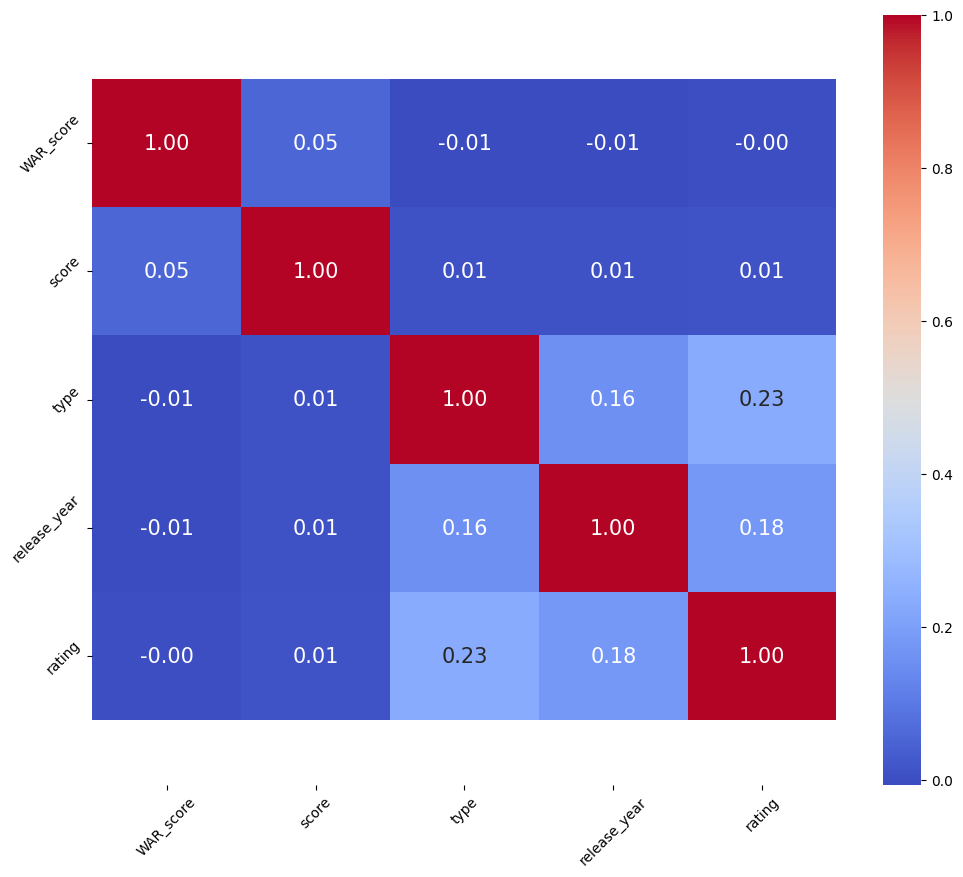

In [218]:
corr = df_f.corr()
plot_corre_heatmap(corr)

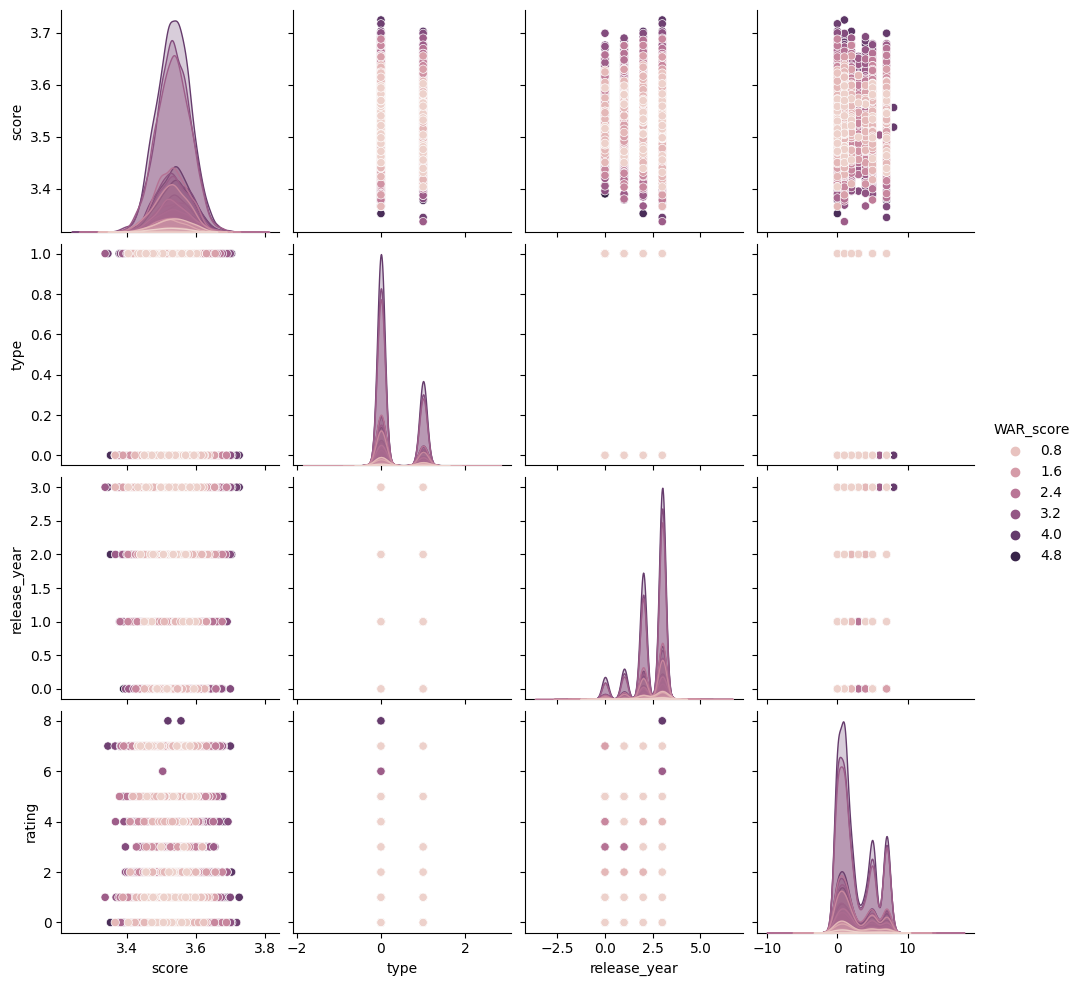

In [220]:
sns.pairplot(df_f, hue = 'WAR_score')
plt.show()

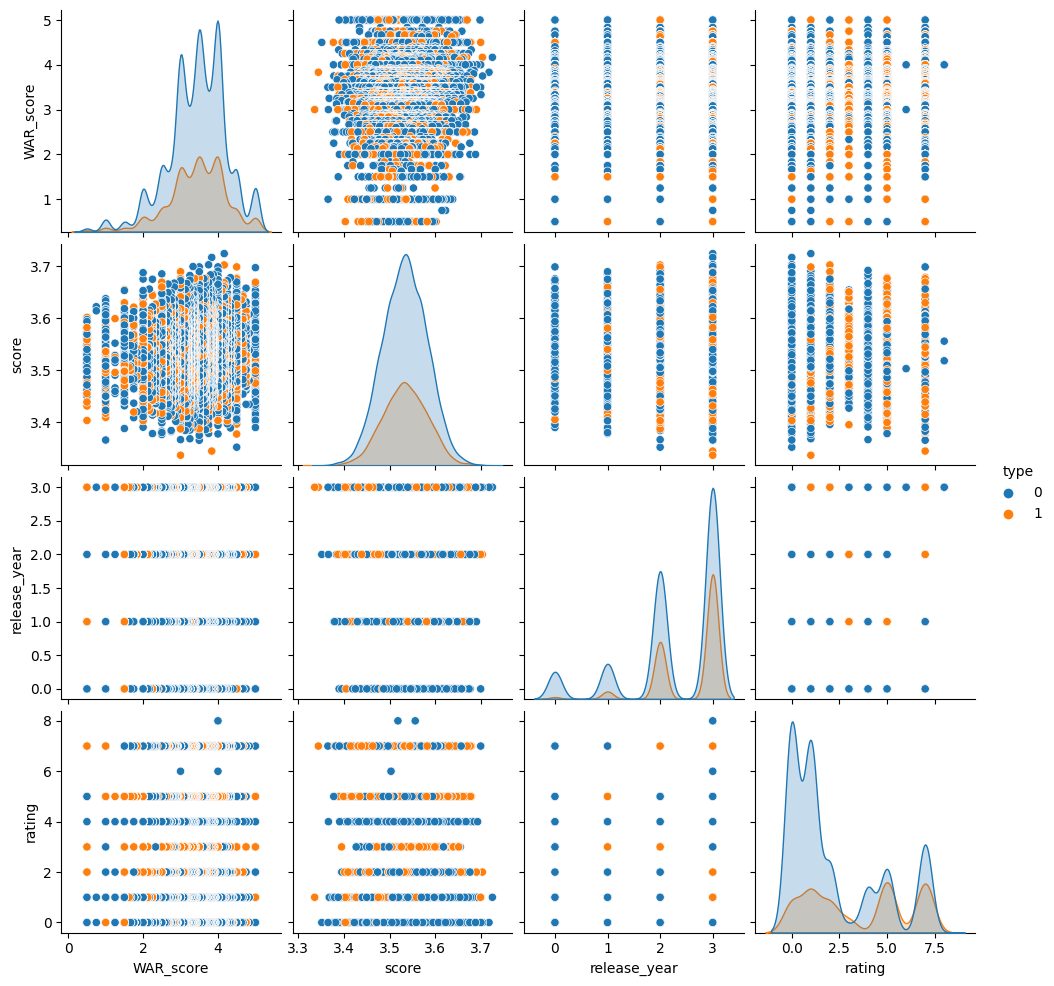

In [221]:
sns.pairplot(df_f, hue = 'type')
plt.show()

In [222]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [226]:
X = df_f[['WAR_score','score','release_year','rating', 'type']]

In [227]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,10)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X, etiquetas)
    lista_sil.append(valor_medio_sil)

c:\Users\Martin Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Martin Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Martin Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Martin Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

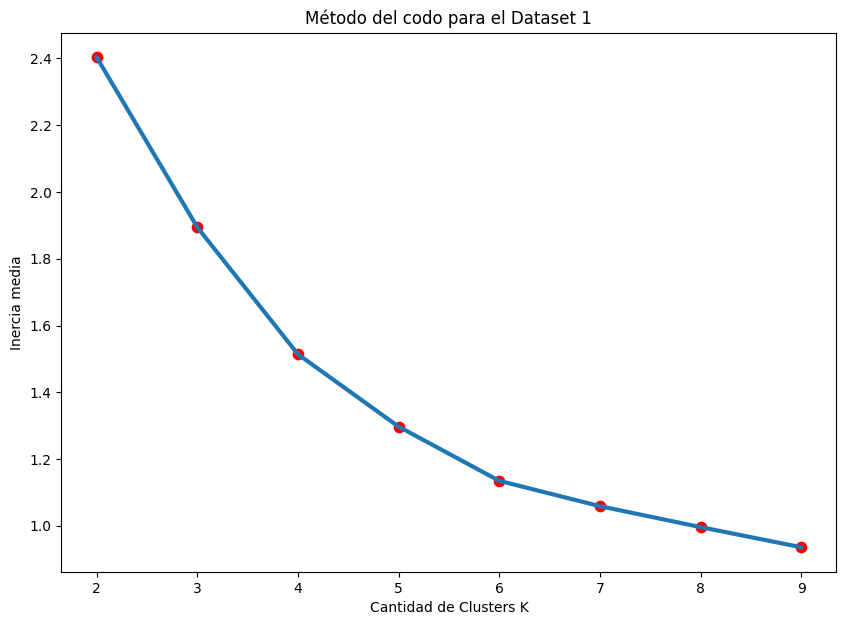

In [228]:
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

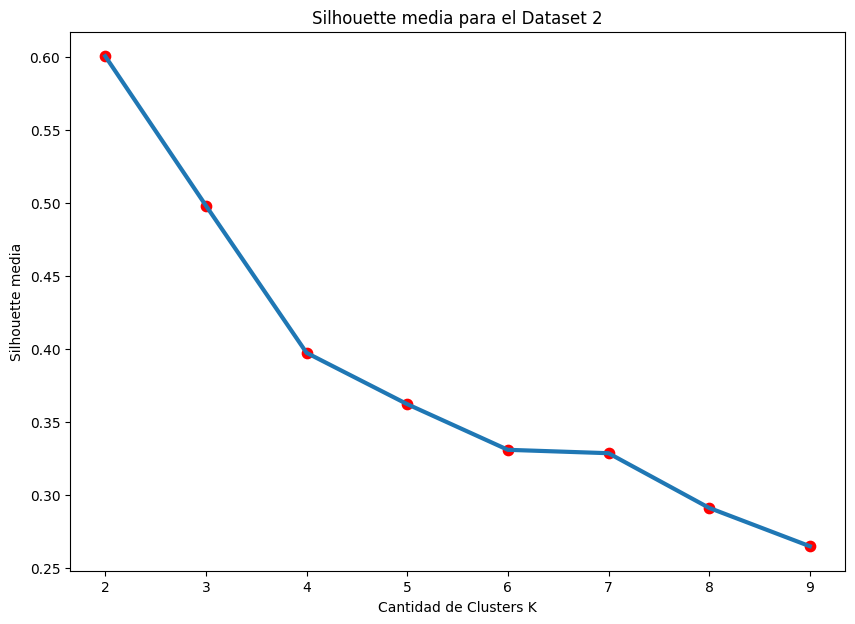

In [229]:
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')

plt.show()

In [230]:
N = 9
km = KMeans(n_clusters=N, random_state=0)

In [231]:
km.fit(X)

c:\Users\Martin Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=0)

In [232]:
clusters = pd.DataFrame(data=km.cluster_centers_, columns=['WAR_score','score','release_year','rating', 'type'])

In [233]:
clusters

,WAR_score,score,release_year,rating,type
0,3.711228,3.533939,2.574587,1.000000e+00,0.228184
1,4.033888,3.536818,2.768874,7.000662e+00,0.498013
2,3.812469,3.534572,1.859826,4.579477e+00,0.273642
3,3.560742,3.534644,2.510019,2.215172e+00,0.460401
4,2.886392,3.532573,2.738139,6.999384e+00,0.335798
5,3.492472,3.531569,0.525389,7.720207e-01,0.070984
6,3.674917,3.533718,2.707688,-1.199041e-14,0.164461
7,3.153434,3.531711,2.785196,4.854862e+00,0.446541
8,2.131874,3.528652,2.605079,6.425397e-01,0.237460
